In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# **Question 1**

**1(a)**

In [3]:
df = pd.read_csv("/content/IMDB Dataset.csv")

**1(b)**

In [4]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['review'])
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

**1(c)**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**1(d)**

In [6]:
#Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
#Multinomial(Naive Bayes Model)
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

1(e)

In [8]:
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy:.3f}")

nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f"Multinomial Naive Bayes Accuracy: {nb_accuracy:.3f}")

Logistic Regression Accuracy: 0.893
Multinomial Naive Bayes Accuracy: 0.849


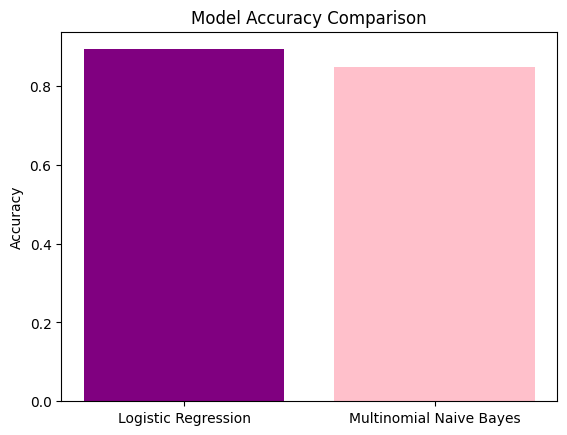



Logistic Regression performs better because it captures linear relationships effectively.


In [9]:
models = ['Logistic Regression', 'Multinomial Naive Bayes']
accuracies = [lr_accuracy, nb_accuracy]

plt.bar(models, accuracies, color=['purple', 'pink'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()
print('\n')
if lr_accuracy > nb_accuracy:
    print("Logistic Regression performs better because it captures linear relationships effectively.")
else:
    print("Multinomial Naive Bayes performs better, possibly due to its probabilistic approach to text classification.")

# **Question 2**

2(a) and 1(a) is same

**2(b)**

In [10]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['review'])

**2(c)**

In [11]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

2(d)

In [12]:
#Logistic Regression Model
lr_model.fit(X_train_tfidf, y_train)
lr_model_preds_tfidf = lr_model.predict(X_test_tfidf)

#Multinomial(Naive Bayes Model)
nb_model.fit(X_train_tfidf, y_train)
nb_preds_tfidf = nb_model.predict(X_test_tfidf)

**2(e)**

In [13]:
lr_accuracy_tfidf = accuracy_score(y_test, lr_model_preds_tfidf)
print(f"Logistic Regression Accuracy(TFIDF): {lr_accuracy_tfidf:.3f}")

nb_accuracy_tfidf = accuracy_score(y_test, nb_preds_tfidf)
print(f"Multinomial Naive Bayes Accuracy(TFIDF): {nb_accuracy_tfidf:.3f}")

Logistic Regression Accuracy(TFIDF): 0.900
Multinomial Naive Bayes Accuracy(TFIDF): 0.864


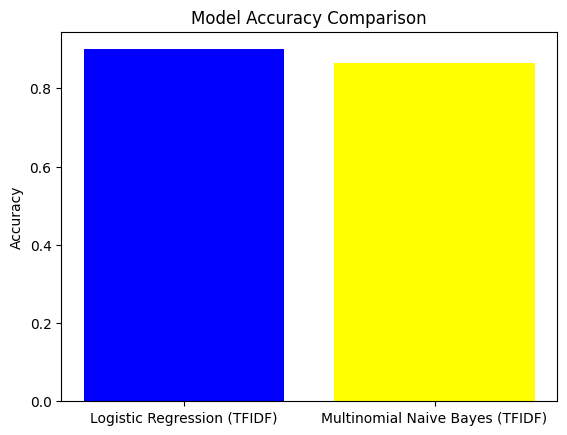



Logistic Regression (TFIDF) performs better because it captures linear relationships effectively.


In [14]:
models = ['Logistic Regression (TFIDF)', 'Multinomial Naive Bayes (TFIDF)']
accuracies = [lr_accuracy_tfidf, nb_accuracy_tfidf]

plt.bar(models, accuracies, color=['blue', 'yellow'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()
print('\n')
if lr_accuracy_tfidf > nb_accuracy_tfidf:
    print("Logistic Regression (TFIDF) performs better because it captures linear relationships effectively.")
else:
    print("Multinomial Naive Bayes (TFIDF) performs better, possibly due to its probabilistic approach to text classification.")

**Comparission between bag-of-words and a TF-IDF model**

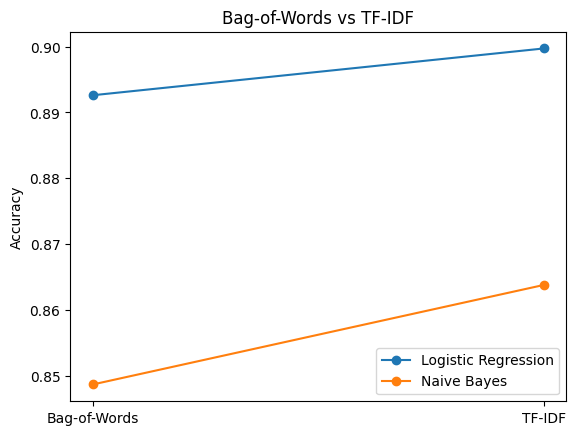


Logistic Regression (TFIDF) performs better.

Multinomial Naive Bayes (TFIDF) performs better.


In [15]:
vectorizers = ['Bag-of-Words', 'TF-IDF']
lr_accuracies = [lr_accuracy, lr_accuracy_tfidf]
nb_accuracies = [nb_accuracy, nb_accuracy_tfidf]

plt.plot(vectorizers, lr_accuracies, label="Logistic Regression", marker='o')
plt.plot(vectorizers, nb_accuracies, label="Naive Bayes", marker='o')
plt.title("Bag-of-Words vs TF-IDF")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
if lr_accuracy > lr_accuracy_tfidf:
    print("\nLogistic Regression performs better.")
else:
    print("\nLogistic Regression (TFIDF) performs better.\n")
if nb_accuracy > nb_accuracy_tfidf:
    print("Multinomial Naive Bayes performs better.")
else:
    print("Multinomial Naive Bayes (TFIDF) performs better.")

# **Question 3**

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

In [17]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['review'])
X_seq = tokenizer.texts_to_sequences(df['review'])
maxlen=100
X_padded = pad_sequences(X_seq, padding='post', maxlen=maxlen)
vocab_size = len(tokenizer.word_index) + 1


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

In [19]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [20]:
embedding_dim = 100
embedding_matrix = create_embedding_matrix('/content/glove.6B.100d.txt', tokenizer.word_index, embedding_dim)

In [21]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.6044119659082678

In [22]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim,
                           input_length=maxlen))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          12425300  
                                                                 
 dense (Dense)               (None, 100, 10)           1010      
                                                                 
 dense_1 (Dense)             (None, 100, 1)            11        
                                                                 
Total params: 12426321 (47.40 MB)
Trainable params: 12426321 (47.40 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    validation_data=(X_test, y_test),
                    batch_size=65)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Epoch 1/50
616/616 [==============================] - 214s 346ms/step - loss: 0.6809 - accuracy: 0.5517 - val_loss: 0.6775 - val_accuracy: 0.5582
Epoch 2/50
616/616 [==============================] - 212s 344ms/step - loss: 0.6729 - accuracy: 0.5666 - val_loss: 0.6775 - val_accuracy: 0.5589
Epoch 3/50
616/616 [==============================] - 212s 344ms/step - loss: 0.6694 - accuracy: 0.5686 - val_loss: 0.6790 - val_accuracy: 0.5579
Epoch 4/50
616/616 [==============================] - 211s 343ms/step - loss: 0.6674 - accuracy: 0.5697 - val_loss: 0.6800 - val_accuracy: 0.5588
Epoch 5/50
616/616 [==============================] - 213s 345ms/step - loss: 0.6662 - accuracy: 0.5700 - val_loss: 0.6808 - val_accuracy: 0.5578
Epoch 6/50
616/616 [==============================] - 211s 342ms/step - loss: 0.6654 - accuracy: 0.5700 - val_loss: 0.6817 - val_accuracy: 0.5589
Epoch 7/50
616/616 [==============================] - 213s 345ms/step - loss: 0.6649 - accuracy: 0.5705 - val_loss: 0.6826 -

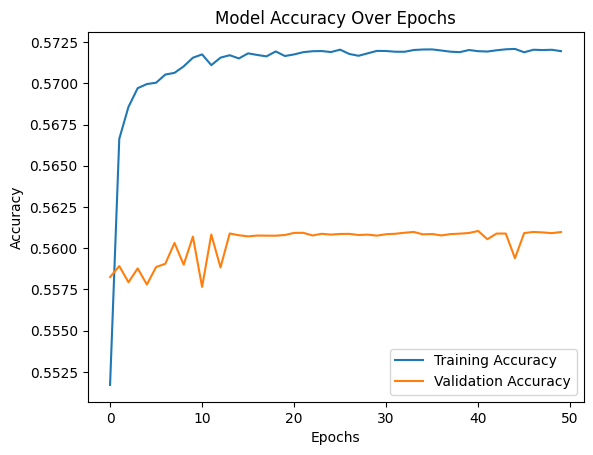

In [24]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Logistic Regression (Bag-of-Words): 0.89
Naive Bayes (Bag-of-Words): 0.85
Logistic Regression (TF-IDF): 0.90
Naive Bayes (TF-IDF): 0.86
RNN Model: 0.56


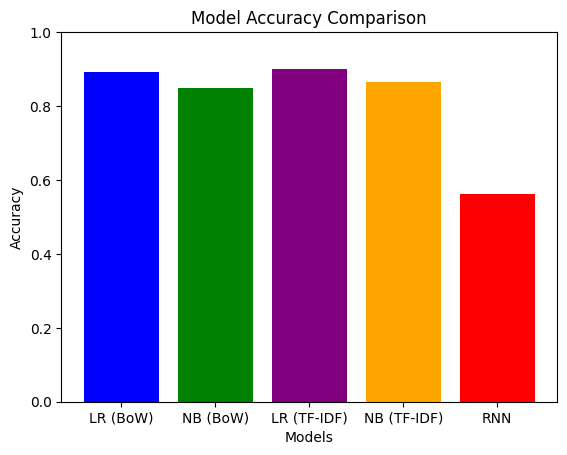

The best-performing model is: LR (TF-IDF) with an accuracy of 0.90


In [26]:
# Accuracies of classical models from Questions 1 and 2

# Accuracy of the RNN model
rnn_accuracy = accuracy  # From the evaluation of the shallow RNN model

# Display accuracies
print(f"Logistic Regression (Bag-of-Words): {lr_accuracy:.2f}")
print(f"Naive Bayes (Bag-of-Words): {nb_accuracy:.2f}")
print(f"Logistic Regression (TF-IDF): {lr_accuracy_tfidf:.2f}")
print(f"Naive Bayes (TF-IDF): {nb_accuracy_tfidf:.2f}")
print(f"RNN Model: {rnn_accuracy:.2f}")

# Visualization
models = ['LR (BoW)', 'NB (BoW)', 'LR (TF-IDF)', 'NB (TF-IDF)', 'RNN']
accuracies = [lr_accuracy, nb_accuracy, lr_accuracy_tfidf, nb_accuracy_tfidf, rnn_accuracy]

plt.bar(models, accuracies, color=['blue', 'green', 'purple', 'orange', 'red'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.ylim(0, 1)
plt.show()

# Explanation
best_model = models[accuracies.index(max(accuracies))]
print(f"The best-performing model is: {best_model} with an accuracy of {max(accuracies):.2f}")
